## Kaggle Poety Dataset

In [1]:
# POEtryimport pandas as pd
import numpy as np
import os
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords

In [2]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [3]:

DATA = pd.read_csv("all.csv")
tDATA = DATA["type"]
DATA


,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
5,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\r\n ...",Sonnet 17,Renaissance,Mythology & Folklore
6,SIR WALTER RALEGH,Praisd be Dianas fair and harmless light;\r\nP...,Praisd be Dianas Fair and Harmless Light,Renaissance,Mythology & Folklore
7,QUEEN ELIZABETH I,"When I was fair and young, then favor graced m...",When I Was Fair and Young,Renaissance,Mythology & Folklore
8,JOHN DONNE,"When by thy scorn, O murd'ress, I am dead\r\n ...",The Apparition,Renaissance,Mythology & Folklore
9,JOHN SKELTON,"Pla ce bo,\r\nWho is there, who?\r\nDi le xi,\...",The Book of Phillip Sparrow,Renaissance,Mythology & Folklore


# Exploratory data analysis and visualization via Dimenionality Reduction

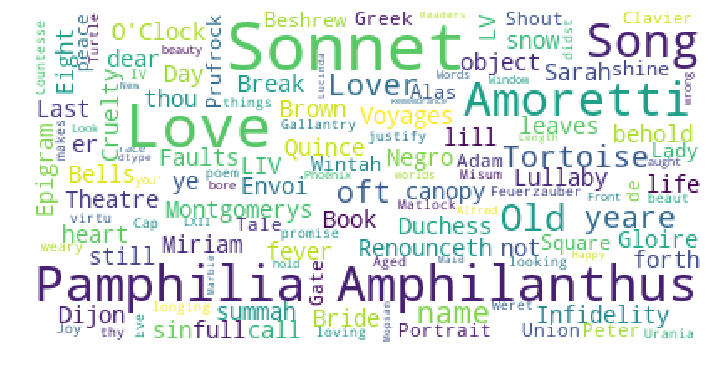

In [109]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(DATA[DATA['type']=='Love']['poem name']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


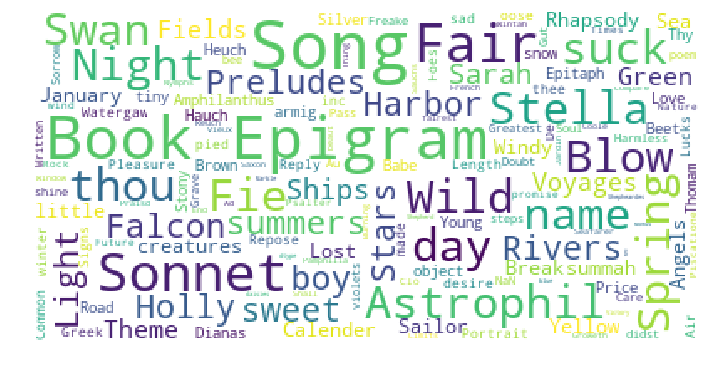

In [110]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(DATA[DATA['type']=='Nature']['poem name']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

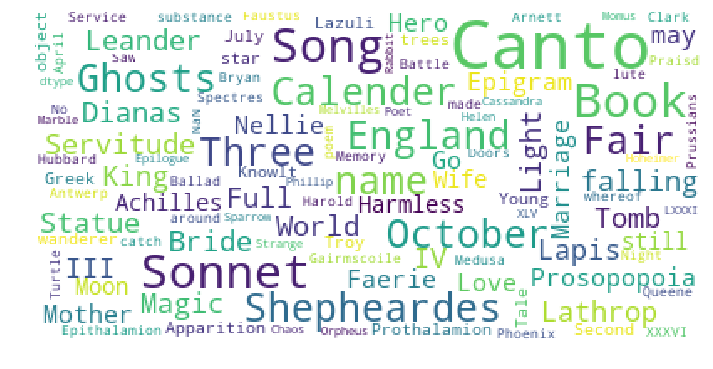

In [111]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(DATA[DATA['type']=='Mythology & Folklore']['poem name']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [113]:
print(DATA['type'].value_counts())
print(DATA['author'].value_counts())

Love                    326
Nature                  188
Mythology & Folklore     59
Name: type, dtype: int64
WILLIAM SHAKESPEARE                                 71
SIR PHILIP SIDNEY                                   42
JOHN DONNE                                          41
EDMUND SPENSER                                      34
WILLIAM BUTLER YEATS                                26
SIR THOMAS WYATT                                    22
CARL SANDBURG                                       16
EZRA POUND                                          16
THOMAS CAMPION                                      15
HART CRANE                                          14
D. H. LAWRENCE                                      14
SARA TEASDALE                                       14
WALLACE STEVENS                                     14
EN JONSON                                           13
PAUL LAURENCE DUNBAR                                12
IVOR GURNEY                                         11
LOUISE BOGA

### Observation

Here we can see that our data is imbalanced with more poems in love and very less in
Mythological and folklore , here we can also see most of the poems are of William Shakespear

# TSNE plots

### For BOW

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


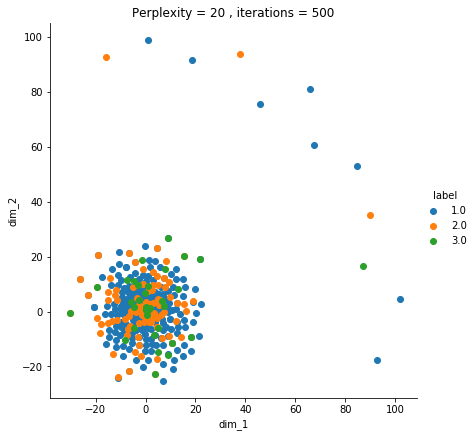

In [155]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2,perplexity=20,n_iter=500,random_state=0) 
# converting sparse to a dense array
final_count= BOW_Train.toarray()
# standardizing our data making mean=0 and std_dev=1
standardize = StandardScaler().fit_transform(final_count)
BOW_data = model.fit_transform(standardize)
#creating a new data which help us in plotting the result data
BOW_data = np.vstack((BOW_data.T,y_tr)).T
BOW_df = pd.DataFrame(data = BOW_data,columns=("dim_1","dim_2","label"))
# Plotting the result of tsne
sns.FacetGrid(BOW_df,hue="label",size=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.title('Perplexity = 20 , iterations = 500')
plt.show() 

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


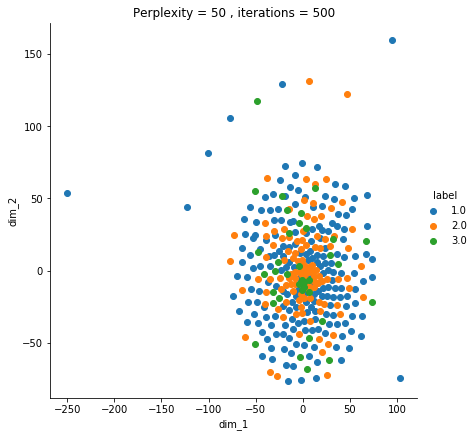

In [160]:

from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2,perplexity=50,n_iter=500,random_state=0) 
# converting sparse to a dense array
final_count= BOW_Train.toarray()
# standardizing our data making mean=0 and std_dev=1
standardize = StandardScaler().fit_transform(final_count)
BOW_data = model.fit_transform(standardize)
#creating a new data which help us in plotting the result data
BOW_data = np.vstack((BOW_data.T,y_tr)).T
BOW_df = pd.DataFrame(data = BOW_data,columns=("dim_1","dim_2","label"))
# Plotting the result of tsne
sns.FacetGrid(BOW_df,hue="label",size=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.title('Perplexity = 50 , iterations = 500')
plt.show() 

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


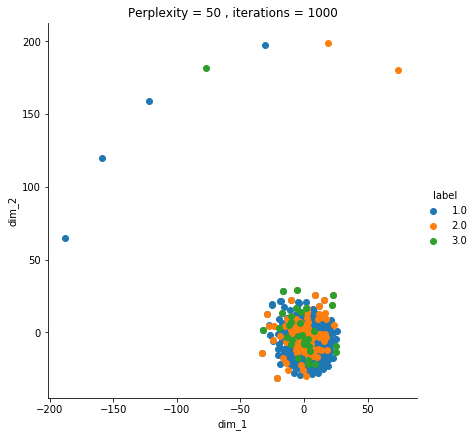

In [161]:
from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2,perplexity=50,n_iter=1000,random_state=0) 
# converting sparse to a dense array
final_count= BOW_Train.toarray()
# standardizing our data making mean=0 and std_dev=1
standardize = StandardScaler().fit_transform(final_count)
BOW_data = model.fit_transform(standardize)
#creating a new data which help us in plotting the result data
BOW_data = np.vstack((BOW_data.T,y_tr)).T
BOW_df = pd.DataFrame(data = BOW_data,columns=("dim_1","dim_2","label"))
# Plotting the result of tsne
sns.FacetGrid(BOW_df,hue="label",size=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.title('Perplexity = 50 , iterations = 1000')
plt.show() 

### For TFIDF

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


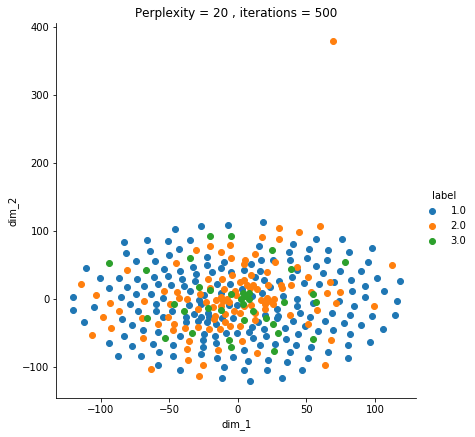

In [164]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2,perplexity=20,n_iter=500,random_state=0) 
# converting sparse to a dense array
final_count= TFIDF_Train.toarray()
# standardizing our data making mean=0 and std_dev=1
standardize = StandardScaler().fit_transform(final_count)
tfidf_data = model.fit_transform(standardize)
#creating a new data which help us in plotting the result data
tfidf_data = np.vstack((tfidf_data.T,y_tr)).T
tfidf_df = pd.DataFrame(data = tfidf_data,columns=("dim_1","dim_2","label"))
# Plotting the result of tsne
sns.FacetGrid(tfidf_df,hue="label",size=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.title('Perplexity = 20 , iterations = 500')
plt.show() 

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


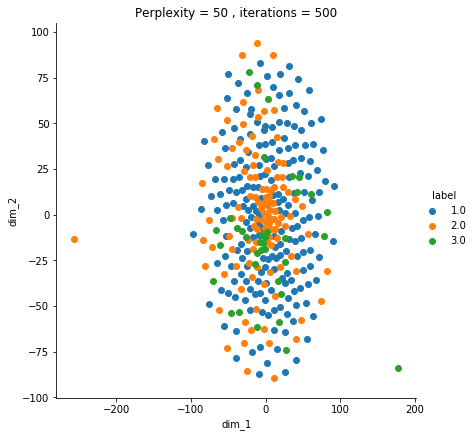

In [165]:
from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2,perplexity=50,n_iter=500,random_state=0) 
# converting sparse to a dense array
final_count= TFIDF_Train.toarray()
# standardizing our data making mean=0 and std_dev=1
standardize = StandardScaler().fit_transform(final_count)
tfidf_data = model.fit_transform(standardize)
#creating a new data which help us in plotting the result data
tfidf_data = np.vstack((tfidf_data.T,y_tr)).T
tfidf_df = pd.DataFrame(data = tfidf_data,columns=("dim_1","dim_2","label"))
# Plotting the result of tsne
sns.FacetGrid(tfidf_df,hue="label",size=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.title('Perplexity = 50 , iterations = 500')
plt.show() 

### DATA Preprocessing

In [4]:
poems = DATA["content"].values
print(poems[0])

Let the bird of loudest lay
On the sole Arabian tree
Herald sad and trumpet be,
To whose sound chaste wings obey.

But thou shrieking harbinger,
Foul precurrer of the fiend,
Augur of the fever's end,
To this troop come thou not near.

From this session interdict
Every fowl of tyrant wing,
Save the eagle, feather'd king;
Keep the obsequy so strict.

Let the priest in surplice white,
That defunctive music can,
Be the death-divining swan,
Lest the requiem lack his right.

And thou treble-dated crow,
That thy sable gender mak'st
With the breath thou giv'st and tak'st,
'Mongst our mourners shalt thou go.

Here the anthem doth commence:
Love and constancy is dead;
Phoenix and the Turtle fled
In a mutual flame from hence.

So they lov'd, as love in twain
Had the essence but in one;
Two distincts, division none:
Number there in love was slain.

Hearts remote, yet not asunder;
Distance and no space was seen
'Twixt this Turtle and his queen:
But in them it were a wonder.

So between them love di

In [5]:
Category = DATA['type']
CAT = []
for i in Category:
    if i=='Love':
        CAT.append(1)
    if i=='Nature':
        CAT.append(2)
    if i=='Mythology & Folklore':
        CAT.append(3)
print(CAT[57])
        

2


In [6]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [7]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(poems):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 573/573 [00:00<00:00, 2410.80it/s]


In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn import cross_validation
from scipy.sparse import csr_matrix,hstack

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_1, X_test, y_1, y_test = cross_validation.train_test_split(preprocessed_reviews,CAT, test_size=0.2, random_state=0)
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.25)
print(np.asarray(X_1).shape,np.asarray(X_test).shape,np.asarray(X_tr).shape,np.asarray(X_test).shape,np.asarray(X_cv).shape)

(458,) (115,) (343,) (115,) (115,)


# Bag of Words

In [11]:
count_vect = CountVectorizer() #in scikit-learn
BOW_Train = count_vect.fit_transform(X_tr)
BOW_test = count_vect.transform(X_test)
BOW_CV = count_vect.transform(X_cv)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(BOW_Train))
print("the shape of out text BOW vectorizer ",BOW_Train.get_shape())
print("the number of unique words ", BOW_Train.get_shape()[1])

some feature names  ['abandonment', 'abasht', 'abate', 'abhor', 'abhorring', 'abject', 'abjure', 'abler', 'aboard', 'aboue']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (343, 7602)
the number of unique words  7602


# TFIDF

In [12]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
TFIDF_Train = tf_idf_vect.fit_transform(X_tr)
TFIDF_Test = tf_idf_vect.transform(X_test)
TFIDF_Validation = tf_idf_vect.transform(X_cv)
print("the type of count vectorizer ",type(TFIDF_Train))
print("the shape of out text TFIDF vectorizer ",TFIDF_Train.get_shape())
print("the number of unique words including both unigrams and bigrams ", TFIDF_Train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (343, 487)
the number of unique words including both unigrams and bigrams  487


# Word2vec

In [13]:
i=0
list_of_sentance=[]
list_of_sentance_cv=[]
list_of_sentance_test=[]
for sentance in X_tr:
    list_of_sentance.append(sentance.split())
for sentance in X_cv:
    list_of_sentance_cv.append(sentance.split())
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [14]:
from gensim.models import Word2Vec
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=100, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('would', 0.9999216794967651), ('thy', 0.9999174475669861), ('love', 0.9999151825904846), ('no', 0.9999126195907593), ('doth', 0.9999116659164429), ('see', 0.999908447265625), ('well', 0.999907374382019), ('not', 0.999906063079834), ('night', 0.9999047517776489), ('make', 0.9999014139175415)]
[('soon', 0.9960910081863403), ('song', 0.9960669875144958), ('silver', 0.9960477948188782), ('heart', 0.9960363507270813), ('proud', 0.9960245490074158), ('loves', 0.9960235953330994), ('day', 0.9959831833839417), ('unto', 0.9959830641746521), ('give', 0.9959542155265808), ('face', 0.995953381061554)]


/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [15]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  1297
sample words  ['gray', 'marriage', 'fishes', 'borrow', 'bears', 'art', 'english', 'alway', 'iv', 'slain', 'around', 'deem', 'e', 'sestos', 'got', 'painted', 'tongue', 'published', 'fly', 'wherein', 'bid', 'glory', 'songs', 'brightness', 'wind', 'breed', 'sets', 'nectar', 'fit', 'hardly', 'greater', 'doom', 'fancies', 'white', 'swim', 'fame', 'rosy', 'love', 'spent', 'grows', 'speak', 'hither', 'ends', 'dark', 'turtle', 'side', 'beauty', 'path', 'silver', 'kind']


### Avg W2v

In [16]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 115/115 [00:00<00:00, 364.97it/s]

343
100


# Multinomial Naive Bayes

### For BOW

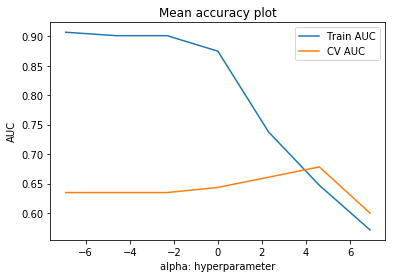

In [59]:
from sklearn.naive_bayes import MultinomialNB
alph = [10**(-3),10**(-2),10**(-1),1,10,100,1000]
BOW_Train_Accuracy = []
BOW_CV_Accuracy = []
for i in alph:
    model = MultinomialNB(alpha=i)
    model.fit(BOW_Train,y_tr)
    BOW_Train_Accuracy.append(model.score(BOW_Train,y_tr))
    BOW_CV_Accuracy.append(model.score(BOW_CV,y_cv))
   
plt.plot(np.log(np.asarray(alph)), BOW_Train_Accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(alph)), BOW_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Mean accuracy plot")
plt.show()

In [75]:
best_alpha = 1

### Testing on test data

In [87]:
model = MultinomialNB(alpha=best_alpha)
model.fit(BOW_Train,y_tr)
Final_accuracy = model.score(BOW_test,y_test)
print("The accuracy of our NAIVE BAYES model is %f "%(Final_accuracy))


The accuracy of our NAIVE BAYES model is 0.634783 


### Important features

In [92]:
a = model.feature_log_prob_
b =  a[0].argsort()[0:-10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))
print("*"*50)
a = model.feature_log_prob_
b =  a[1].argsort()[0:10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))
print('*'*50)
a = model.feature_log_prob_
b =  a[2].argsort()[0:10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))

 So the top 10 features of positive class are--
feature name : doth , value : -5.888079
feature name : shall , value : -6.078122
feature name : yet , value : -6.201736
feature name : eyes , value : -6.312962
feature name : heart , value : -6.703828
feature name : still , value : -6.312962
feature name : hath , value : -6.342815
feature name : time , value : -6.794800
feature name : see , value : -6.342815
feature name : us , value : -6.472026
**************************************************
 So the top 10 features of positive class are--
feature name : gnaw , value : -9.839322
feature name : gnat , value : -9.839322
feature name : scope , value : -9.839322
feature name : glowing , value : -9.839322
feature name : scorned , value : -9.839322
feature name : gloves , value : -9.839322
feature name : scornful , value : -9.839322
feature name : gloriously , value : -9.839322
feature name : scorning , value : -9.839322
feature name : zone , value : -9.839322
*******************************

### Confusion Matrix

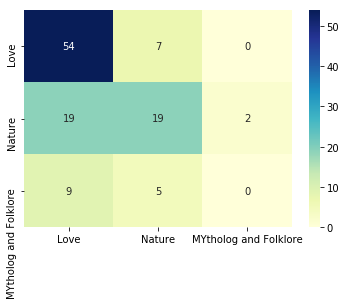

In [78]:
ytest = model.predict(BOW_test)
ctest = confusion_matrix(y_test,ytest)
class_label=["Love","Nature","MYtholog and Folklore"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")

### For TFIDF

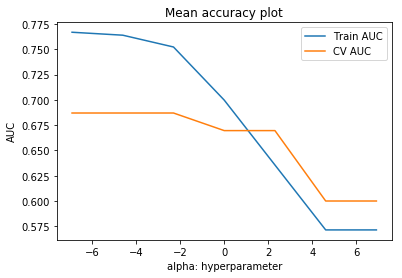

In [81]:
alph = [10**(-3),10**(-2),10**(-1),1,10,100,1000]
TFIDF_Train_Accuracy = []
TFIDF_CV_Accuracy = []
for i in alph:
    model = MultinomialNB(alpha=i)
    model.fit(TFIDF_Train,y_tr)
    TFIDF_Train_Accuracy.append(model.score(TFIDF_Train,y_tr))
    TFIDF_CV_Accuracy.append(model.score(TFIDF_Validation,y_cv))
   
plt.plot(np.log(np.asarray(alph)), TFIDF_Train_Accuracy, label='Train AUC')
plt.plot(np.log(np.asarray(alph)), TFIDF_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Mean accuracy plot")
plt.show()

In [84]:
best_alpha = 1

In [93]:
model = MultinomialNB(alpha=best_alpha)
model.fit(TFIDF_Train,y_tr)
Final_accuracy = model.score(TFIDF_Test,y_test)
print("The accuracy of our NAIVE BAYES model is %f "%(Final_accuracy))


The accuracy of our NAIVE BAYES model is 0.617391 


### Important Features

In [97]:
a = model.feature_log_prob_
b =  a[0].argsort()[0:10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))
print('*'*50)
a = model.feature_log_prob_
b =  a[1].argsort()[0:10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))
print("*"*50)
a = model.feature_log_prob_
b =  a[2].argsort()[0:10][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
    print("feature name : %s , value : %f"%(count_vect.get_feature_names()[b[i]],float(a[1,b[i]])))    

 So the top 10 features of positive class are--
feature name : aspiring , value : -6.247188
feature name : autumn , value : -5.977974
feature name : act , value : -6.547932
feature name : acherontes , value : -6.441643
feature name : assayde , value : -6.192822
feature name : accept , value : -6.199810
feature name : aiken , value : -6.529133
feature name : asked , value : -5.465876
feature name : bagpype , value : -6.003149
feature name : apply , value : -5.098805
**************************************************
 So the top 10 features of positive class are--
feature name : affairs , value : -6.825026
feature name : absurdly , value : -6.827404
feature name : allah , value : -6.832129
feature name : adam , value : -6.835932
feature name : april , value : -6.840817
feature name : abused , value : -6.841681
feature name : became , value : -6.862383
feature name : arriv , value : -6.891910
feature name : bacon , value : -6.891910
feature name : ban , value : -6.891910
*****************

### Confusion Matrix

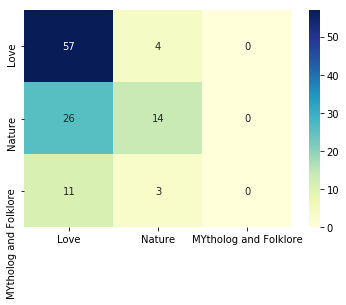

In [98]:
ytest = model.predict(TFIDF_Test)
ctest = confusion_matrix(y_test,ytest)
class_label=["Love","Nature","MYtholog and Folklore"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")

# K Nearest Neighbour

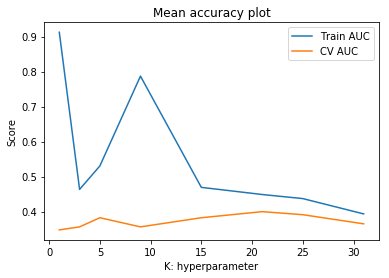

In [127]:
from sklearn.neighbors import KNeighborsClassifier
k = [1,3,5,9,15,21,25,31]
BOW_Train_Accuracy = []
BOW_CV_Accuracy = []
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(BOW_Train,y_tr)
    BOW_Train_Accuracy.append(model.score(BOW_Train,y_tr))
    BOW_CV_Accuracy.append(model.score(BOW_CV,y_cv))
   
plt.plot(np.asarray(k), BOW_Train_Accuracy, label='Train AUC')
plt.plot(np.asarray(k), BOW_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("Score")
plt.title("Mean accuracy plot")
plt.show()

In [129]:
best_k = 21

### Testing on test data

In [132]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(BOW_Train,y_tr)
Final_accuracy = model.score(BOW_test,y_test)
print("The final accuracy obtained is %f%%"%(Final_accuracy*100))

The final accuracy obtained is 40.869565%


### Confusion Matrix

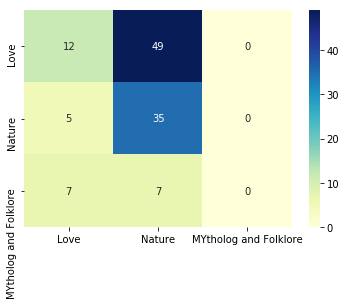

In [134]:
ytest = model.predict(BOW_test)
ctest = confusion_matrix(y_test,ytest)
class_label=["Love","Nature","MYtholog and Folklore"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")

### For W2V

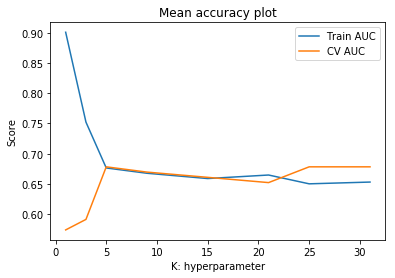

In [135]:
k = [1,3,5,9,15,21,25,31]
w2v_Train_Accuracy = []
w2v_CV_Accuracy = []
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(sent_vectors,y_tr)
    w2v_Train_Accuracy.append(model.score(sent_vectors,y_tr))
    w2v_CV_Accuracy.append(model.score(sent_vectors_cv,y_cv))
   
plt.plot(np.asarray(k), w2v_Train_Accuracy, label='Train AUC')
plt.plot(np.asarray(k), w2v_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("Score")
plt.title("Mean accuracy plot")
plt.show()

In [136]:
best_k = 25

### TEsting on test data

In [137]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(sent_vectors,y_tr)
Final_accuracy = model.score(sent_vectors_test,y_test)
print("The final accuracy obtained is %f%%"%(Final_accuracy*100))

The final accuracy obtained is 59.130435%


### Confusion Matrix

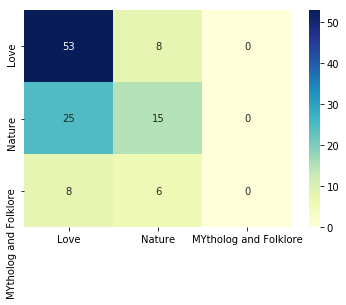

In [138]:
ytest = model.predict(sent_vectors_test)
ctest = confusion_matrix(y_test,ytest)
class_label=["Love","Nature","MYtholog and Folklore"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")

### FOR TFIDF

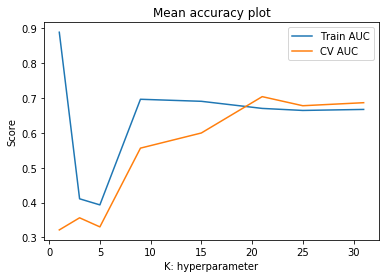

In [141]:
k = [1,3,5,9,15,21,25,31]
TFIDF_Train_Accuracy = []
TFIDF_CV_Accuracy = []
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(TFIDF_Train,y_tr)
    TFIDF_Train_Accuracy.append(model.score(TFIDF_Train,y_tr))
    TFIDF_CV_Accuracy.append(model.score(TFIDF_Validation,y_cv))
   
plt.plot(np.asarray(k), TFIDF_Train_Accuracy, label='Train AUC')
plt.plot(np.asarray(k), TFIDF_CV_Accuracy, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("Score")
plt.title("Mean accuracy plot")
plt.show()

In [148]:
best_k =19

### Testing on test data

In [149]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(TFIDF_Train,y_tr)
Final_accuracy = model.score(TFIDF_Test,y_test)
print("The final accuracy obtained is %f%%"%(Final_accuracy*100))

The final accuracy obtained is 67.826087%


### Confusion Matrix

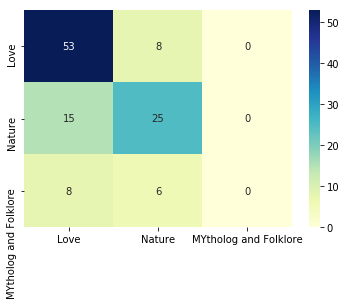

In [150]:
ytest = model.predict(TFIDF_Test)
ctest = confusion_matrix(y_test,ytest)
class_label=["Love","Nature","MYtholog and Folklore"]
df = pd.DataFrame(ctest, index=class_label, columns=class_label)
sns.heatmap(df, annot= True, fmt="d", cmap="YlGnBu")

# XG BOOST

### FOR BOW

scipy.sparse.csr.csr_matrix

### Deep learning MLP

In [17]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal
from keras.layers import Dropout

In [18]:
Y_TRAIN = []
Y_TEST = []
for i in y_tr:
    if i==1:
        Y_TRAIN.append(0)
    if i==2:
        Y_TRAIN.append(1)
    if i==3:
        Y_TRAIN.append(2)
for i in y_test:
    if i==1:
        Y_TEST.append(0)
    if i==2:
        Y_TEST.append(1)
    if i==3:
        Y_TEST.append(2)

In [26]:
Y_CV = []
for i in y_cv:
    if i==1:
        Y_CV.append(0)
    if i==2:
        Y_CV.append(1)
    if i==3:
        Y_CV.append(2)

In [27]:
Y_train = np_utils.to_categorical(Y_TRAIN, 3) 
Y_test = np_utils.to_categorical(Y_TEST, 3)
Y_cv = np_utils.to_categorical(Y_CV,3)

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [1. 0. 0.]


In [191]:
ou_dim=3
input_dim = 100
batch_size = 40
epoch = 12

In [190]:
model = Sequential()
model.add(Dense(60,activation='sigmoid',input_shape=(input_dim,)))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(ou_dim,activation = 'softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 7,983
Trainable params: 7,983
Non-trainable params: 0
_________________________________________________________________


In [196]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(np.asarray(sent_vectors), Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(np.asarray(sent_vectors_test), Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 343 samples, validate on 115 samples
Epoch 1/12
343/343 [==============================] - 2s 7ms/step - loss: 1.4944 - acc: 0.1050 - val_loss: 1.3119 - val_acc: 0.1217
Epoch 2/12
343/343 [==============================] - 0s 48us/step - loss: 1.2255 - acc: 0.1050 - val_loss: 1.1512 - val_acc: 0.1217
Epoch 3/12
343/343 [==============================] - 0s 62us/step - loss: 1.0957 - acc: 0.5277 - val_loss: 1.0715 - val_acc: 0.5304
Epoch 4/12
343/343 [==============================] - 0s 62us/step - loss: 1.0284 - acc: 0.5714 - val_loss: 1.0290 - val_acc: 0.5304
Epoch 5/12
343/343 [==============================] - 0s 77us/step - loss: 0.9904 - acc: 0.5714 - val_loss: 1.0042 - val_acc: 0.5304
Epoch 6/12
343/343 [==============================] - 0s 60us/step - loss: 0.9675 - acc: 0.5714 - val_loss: 0.9894 - val_acc: 0.5304
Epoch 7/12
343/343 [==============================] - 0s 98us/step - loss: 0.9536 - acc: 0.5714 - val_loss: 0

In [200]:
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(input_dim,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(ou_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 78        
Total params: 6,403
Trainable params: 6,403
Non-trainable params: 0
_________________________________________________________________


In [201]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(np.asarray(sent_vectors), Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(np.asarray(sent_vectors_test), Y_test))

Train on 343 samples, validate on 115 samples
Epoch 1/12
343/343 [==============================] - 0s 909us/step - loss: 1.0941 - acc: 0.3265 - val_loss: 1.0723 - val_acc: 0.3739
Epoch 2/12
343/343 [==============================] - 0s 43us/step - loss: 1.0597 - acc: 0.2653 - val_loss: 1.0479 - val_acc: 0.2522
Epoch 3/12
343/343 [==============================] - 0s 45us/step - loss: 1.0352 - acc: 0.5102 - val_loss: 1.0310 - val_acc: 0.5304
Epoch 4/12
343/343 [==============================] - 0s 54us/step - loss: 1.0176 - acc: 0.5714 - val_loss: 1.0181 - val_acc: 0.5304
Epoch 5/12
343/343 [==============================] - 0s 69us/step - loss: 1.0028 - acc: 0.5714 - val_loss: 1.0069 - val_acc: 0.5304
Epoch 6/12
343/343 [==============================] - 0s 56us/step - loss: 0.9897 - acc: 0.5714 - val_loss: 0.9971 - val_acc: 0.5304
Epoch 7/12
343/343 [==============================] - 0s 74us/step - loss: 0.9778 - acc: 0.5714 - val_loss: 0.9891 - val_acc: 0.5304
Epoch 8/12
343/343 [==

In [41]:
ou_dim=3
input_dim = 487
batch_size = 25
epoch = 25

In [45]:

model = Sequential()
model.add(Dense(200,activation='relu',input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(ou_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               97600     
_________________________________________________________________
batch_normalization_16 (Batc (None, 200)               800       
_________________________________________________________________
dense_21 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_17 (Batc (None, 200)               800       
_________________________________________________________________
dense_22 (Dense)             (None, 25)                5025      
_________________________________________________________________
batch_normalization_18 (Batc (None, 25)                100       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 78        
Total para

In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(TFIDF_Train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(TFIDF_Test, Y_test))

Train on 343 samples, validate on 115 samples
Epoch 1/25
343/343 [==============================] - 2s 5ms/step - loss: 1.3573 - acc: 0.4169 - val_loss: 1.0457 - val_acc: 0.5304
Epoch 2/25
343/343 [==============================] - 0s 345us/step - loss: 0.8649 - acc: 0.6035 - val_loss: 1.0289 - val_acc: 0.5565
Epoch 3/25
343/343 [==============================] - 0s 292us/step - loss: 0.6622 - acc: 0.7289 - val_loss: 1.0046 - val_acc: 0.5652
Epoch 4/25
343/343 [==============================] - 0s 308us/step - loss: 0.5657 - acc: 0.8017 - val_loss: 1.0150 - val_acc: 0.6000
Epoch 5/25
343/343 [==============================] - 0s 302us/step - loss: 0.4882 - acc: 0.8309 - val_loss: 1.0204 - val_acc: 0.5826
Epoch 6/25
343/343 [==============================] - 0s 313us/step - loss: 0.4353 - acc: 0.8601 - val_loss: 1.0441 - val_acc: 0.5826
Epoch 7/25
343/343 [==============================] - 0s 335us/step - loss: 0.4143 - acc: 0.8601 - val_loss: 1.0315 - val_acc: 0.5739
Epoch 8/25
343/343

Test score: 1.2903395611306896
Test accuracy: 0.5478260890297267


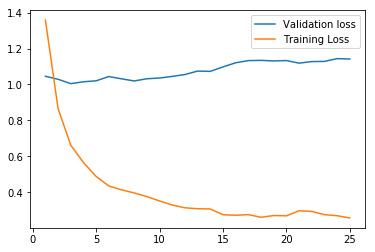

In [47]:
score = model.evaluate(TFIDF_Validation, Y_cv, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
vy = hist.history['val_loss']
ty = hist.history['loss']
x = list(range(1,epoch+1))
plt.plot(x,vy,label = 'Validation loss')
plt.plot(x,ty,label="Training Loss")
plt.legend()
plt.show()

In [42]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(200,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(ou_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               97600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 200)               800       
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_14 (Batc (None, 200)               800       
_________________________________________________________________
dense_18 (Dense)             (None, 25)                5025      
_________________________________________________________________
dropout_11 (Dropout)         (None, 25)                0         
__________

In [43]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(TFIDF_Train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(TFIDF_Test, Y_test))

Train on 343 samples, validate on 115 samples
Epoch 1/25
343/343 [==============================] - 1s 3ms/step - loss: 1.5165 - acc: 0.3936 - val_loss: 1.0050 - val_acc: 0.5478
Epoch 2/25
343/343 [==============================] - 0s 254us/step - loss: 1.4287 - acc: 0.3819 - val_loss: 0.9782 - val_acc: 0.5304
Epoch 3/25
343/343 [==============================] - 0s 203us/step - loss: 1.2836 - acc: 0.4315 - val_loss: 0.9398 - val_acc: 0.5478
Epoch 4/25
343/343 [==============================] - 0s 203us/step - loss: 1.3280 - acc: 0.4373 - val_loss: 0.9043 - val_acc: 0.5826
Epoch 5/25
343/343 [==============================] - 0s 301us/step - loss: 1.2196 - acc: 0.4548 - val_loss: 0.9083 - val_acc: 0.6000
Epoch 6/25
343/343 [==============================] - 0s 261us/step - loss: 1.1662 - acc: 0.5015 - val_loss: 0.9067 - val_acc: 0.5913
Epoch 7/25
343/343 [==============================] - 0s 222us/step - loss: 1.0558 - acc: 0.5364 - val_loss: 0.8992 - val_acc: 0.5913
Epoch 8/25
343/343

Test score: 0.7880023282507191
Test accuracy: 0.6869565264038417


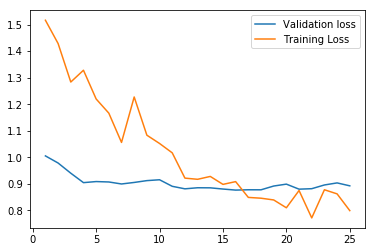

In [44]:
score = model.evaluate(TFIDF_Validation, Y_cv, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
vy = hist.history['val_loss']
ty = hist.history['loss']
x = list(range(1,epoch+1))
plt.plot(x,vy,label = 'Validation loss')
plt.plot(x,ty,label="Training Loss")
plt.legend()
plt.show()

In [37]:
ou_dim=3
input_dim = 7602
batch_size = 25
epoch = 25

In [38]:
model = Sequential()
model.add(Dense(3000,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1000,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dense(500,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(50,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(ou_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3000)              22809000  
_________________________________________________________________
dropout_7 (Dropout)          (None, 3000)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 3000)              12000     
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              3001000   
_________________________________________________________________
batch_normalization_10 (Batc (None, 1000)              4000      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
__________

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(BOW_Train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_data=(BOW_test, Y_test))

Train on 343 samples, validate on 115 samples
Epoch 1/25
343/343 [==============================] - 9s 26ms/step - loss: 1.4274 - acc: 0.3528 - val_loss: 1.3180 - val_acc: 0.5217
Epoch 2/25
343/343 [==============================] - 6s 16ms/step - loss: 0.8642 - acc: 0.6327 - val_loss: 1.0802 - val_acc: 0.6435
Epoch 3/25
343/343 [==============================] - 5s 16ms/step - loss: 0.7135 - acc: 0.7026 - val_loss: 1.0753 - val_acc: 0.6783
Epoch 4/25
343/343 [==============================] - 5s 15ms/step - loss: 0.5674 - acc: 0.7988 - val_loss: 1.0651 - val_acc: 0.7130
Epoch 5/25
343/343 [==============================] - 5s 16ms/step - loss: 0.5189 - acc: 0.7930 - val_loss: 1.1395 - val_acc: 0.6435
Epoch 6/25
343/343 [==============================] - 5s 15ms/step - loss: 0.4327 - acc: 0.8542 - val_loss: 0.9794 - val_acc: 0.6870
Epoch 7/25
343/343 [==============================] - 5s 16ms/step - loss: 0.3994 - acc: 0.8571 - val_loss: 1.0453 - val_acc: 0.6783
Epoch 8/25
343/343 [===

Test score: 1.4324718340583469
Test accuracy: 0.7130434792974721


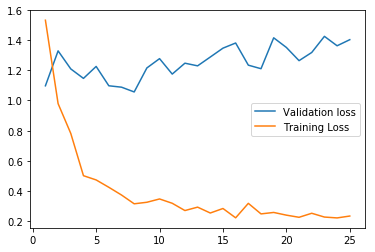

In [36]:
score = model.evaluate(BOW_CV, Y_cv, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
vy = hist.history['val_loss']
ty = hist.history['loss']
x = list(range(1,epoch+1))
plt.plot(x,vy,label = 'Validation loss')
plt.plot(x,ty,label="Training Loss")
plt.legend()
plt.show()

### Deep Learning RNN